<a href="https://colab.research.google.com/github/Sha4719/Capstone-Project-Classification-and-Hypothesis-Testing/blob/main/Sha_Sonja_Arcia_FCV_Potential_Customers_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Importing libraries for visuals, hypothesis testing, machine learning and
# logistics regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# Adding gradient boosting
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# Pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
# Viewing first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
# Viewing last 5 rows
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [5]:
df.shape

(4612, 15)

**Observations:**
* The dataset contains 4612 rows and 15 columns.

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
round(df.isnull().sum()/df.isnull().count() * 100,2)

,0
ID,0.0
age,0.0
current_occupation,0.0
first_interaction,0.0
profile_completed,0.0
website_visits,0.0
time_spent_on_website,0.0
page_views_per_visit,0.0
last_activity,0.0
print_media_type1,0.0


**Observations:**

* There are no duplicates or missing values.



In [8]:
df.dtypes

,0
ID,object
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
time_spent_on_website,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

* Data types fall within ints, objects, and a single float.
* The float value does not provide clarity to the 'page_views_per_visit', so I would like to analyze that further and possibly convert to a more interpretable dtype.

In [10]:
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


**Observations:**

* We can drop the 'ID' column as it is information we do not need for further analysis.

In [11]:
df.drop('ID', axis=1, inplace=True)

In [12]:
# Renaming the print media types to their corresponding actual media types
df.rename(columns={'print_media_type1': 'print_media_newspaper', 'print_media_type2': 'print_media_magazine'}, inplace=True)

In [13]:
# Creating numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [14]:
numerical_features

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'status']

In [15]:
categorical_features

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_newspaper',
 'print_media_magazine',
 'digital_media',
 'educational_channels',
 'referral']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [16]:
# Viewing statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
* The average age is ~46.
* The average website visits is ~3 (there's a big jump from 75% to max).
* The average time spent on a website is around ~724 (seconds).
* The average page view per visit is ~3 with a big jump from 75% to max.

In [17]:
df['age'].value_counts().sort_index()

,count
age,
18,66
19,81
20,75
21,86
22,71
23,85
24,90
25,17
26,15


**Observations:**

* Prospects 55 and up are individuals who appear to be potential customers seeking to upskill, as they are current students seeking additional resources, graduates seeking an edge in the job market, and employees looking to expand their skill set.

* There's a decrease in potential customers between the ages of 25 and 27.

* From the ages of 55-60, some potential customers are looking to reskill, possibly due to changes in their roles, company, or the industry as a whole.

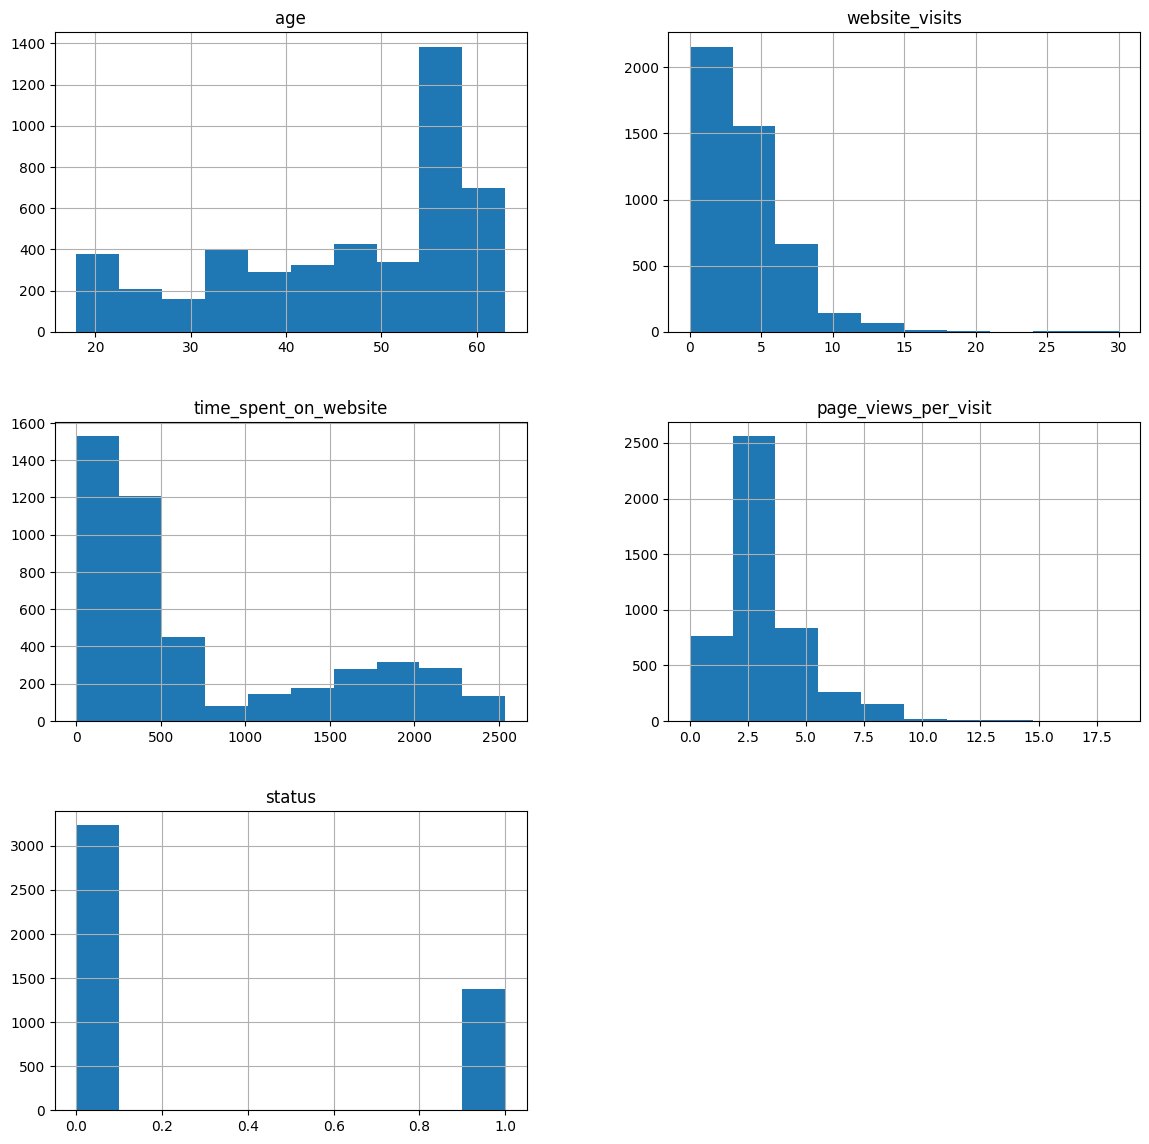

In [18]:
df[numerical_features].hist(figsize=(14,14));

**Observations:**
* According to the charts above, the interactions and activity of the prospects are unsatisfactory in terms of engagement.
* I assume one of the main reasons for such low engagement could be an issue with the UI (User Interface).

In [19]:
for i in categorical_features:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_newspaper
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_magazine
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
**************************************

**Observations:**
* The majority of the leads are professionals. This is an indicator of a highly skilled workforce looking to reskill (when coupled with the average age).
* Students make up the lowest percentage of leads. It would be best to implement more targeted campaigns towards this population to encourage upskilling.
* The website is the initial interaction for leads, but low activity raises concerns about bounces, low CR, and drop-offs, among others.
* Most leads complete their profiles (High and Medium), with very few incompletions.
* A significant percentage of activity occurs via email. This is an indicator that email interactions are a strong tool for marketing and follow-ups with prospects.
* There's a significant percentage of low engagement from print media (still consider whether there's a decent CR among the population that responds to print media).
* Digital media has a very low percentage of engagements, but is worth looking further into due to the positive results of other technological engagements (there's a possibility that this source would have to be readjusted or modified).
* The education channel is not optimal for reaching prospects. This channel would also have to be modified (this could be a reason why students are currently the lowest prospects).
* There is a very low referral rate (a better referral program would need to be implemented as engagement increases).

**Univariate Analysis**

**0. age**

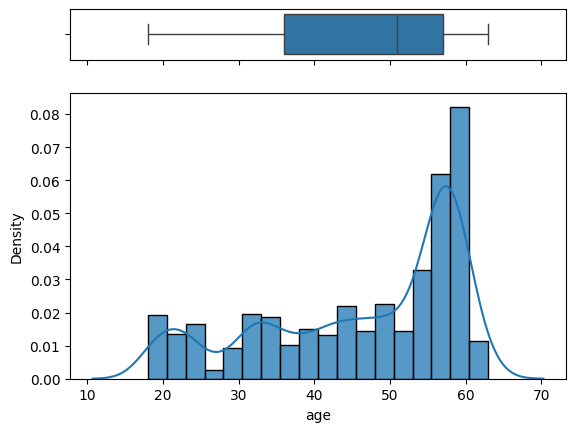

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df, x='age', ax=ax_box)
sns.histplot(data=df, x='age', ax=ax_hist, stat='density')
sns.kdeplot(data=df, x='age', ax=ax_hist)
ax_box.set(xlabel='age')
plt.show()

In [21]:
df['age'].skew()

np.float64(-0.7200216909419968)

**Observations:**

* Distribution is moderately skewed.
* Most conversions are in the ~50-60 age group.
* The majority of younger conversions are consistently around the 0.02 density mark.

**1. current_occupation**

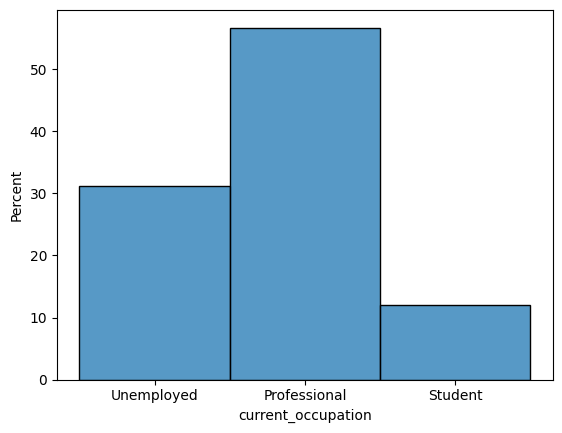

In [22]:
sns.histplot(data=df, x='current_occupation', stat='percent')
plt.show()

**Observations:**

* ~57% of leads are professionals.
* ~32% of leads are unemployed.
* ~12% of leads are students.

**2. first_interaction**

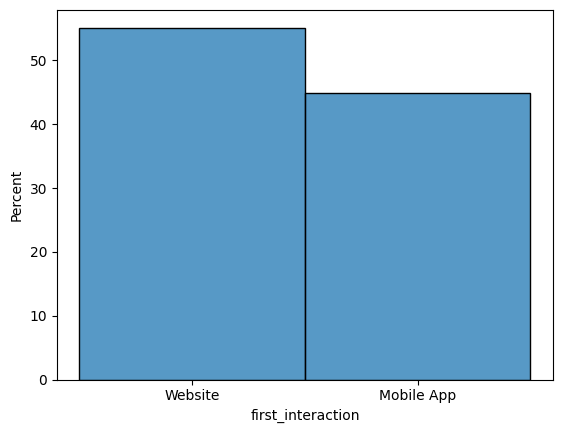

In [23]:
sns.histplot(data=df, x='first_interaction', stat='percent')
plt.show()

**Observations:**

* ~55% of the leads' first interactions is through the company's website.
* ~45%  of the leads' first interactions is through the company's mobile app.

**3. profile_completed**

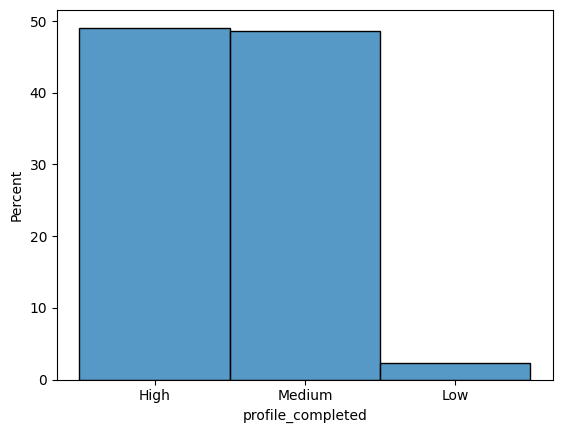

In [24]:
sns.histplot(data=df, x='profile_completed', stat='percent')
plt.show()

**Observations:**

* ~48% of leads have a high profile completion rate.
* ~47% of leads have a medium profile completion rate.
* ~5% of leads have a low profile completion rate.

**4. website_visits**

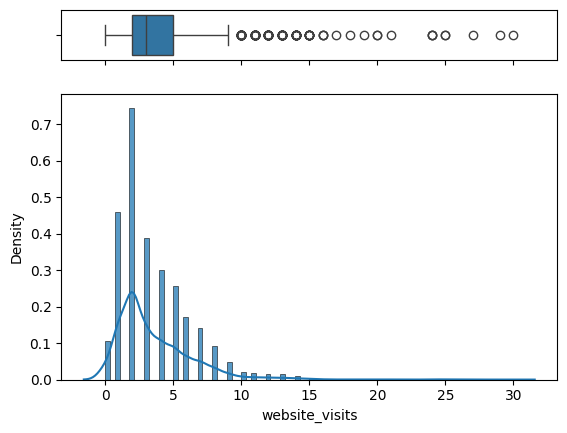

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df, x='website_visits', ax=ax_box)
sns.histplot(data=df, x='website_visits', ax=ax_hist, stat='density')
sns.kdeplot(data=df, x='website_visits', ax=ax_hist)
ax_box.set(xlabel='website_visits')
plt.show()

In [26]:
df['website_visits'].skew()

np.float64(2.156165213085116)

**Observations:**

* Distribution is right-skewed.
* A majority of website visits by leads are between 0 and 5.
* There is a significant number of outliers (which may require reducing skewness).

In [27]:
np.log1p(df['website_visits'])

,website_visits
0,2.079442
1,1.098612
2,1.386294
3,1.609438
4,1.609438
...,...
4607,2.772589
4608,2.197225
4609,1.098612
4610,0.693147


In [28]:
# Overwrite original feature
df['website_visits'] = np.log1p(df['website_visits'])

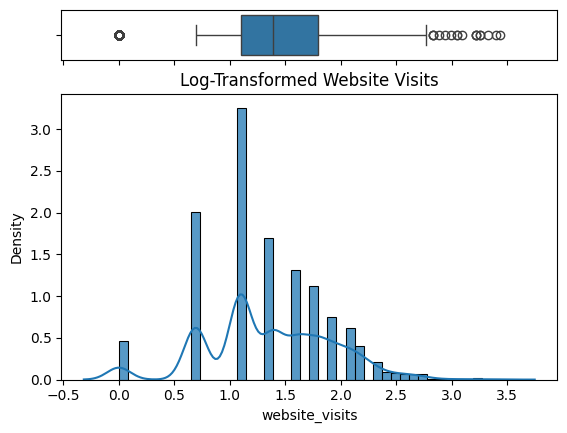

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df, x='website_visits', ax=ax_box)
sns.histplot(data=df, x='website_visits', ax=ax_hist, stat='density')
sns.kdeplot(data=df, x='website_visits', ax=ax_hist)
ax_box.set(xlabel='website_visits')
plt.title('Log-Transformed Website Visits')
plt.show()

In [30]:
df['website_visits'].skew()

np.float64(0.0016817206268886138)

**Observations:**

* The chart is closer to a normal distribution than the pre-logged transformation.
* Extreme values have decreased.

**5. time_spent_on_website**

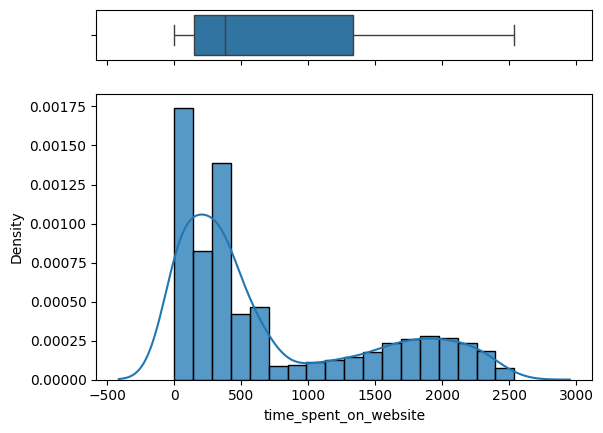

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df, x='time_spent_on_website', ax=ax_box)
sns.histplot(data=df, x='time_spent_on_website', ax=ax_hist, stat='density')
sns.kdeplot(data=df, x='time_spent_on_website', ax=ax_hist)
ax_box.set(xlabel='time_spent_on_website')
plt.show()

In [32]:
df['time_spent_on_website'].skew()

np.float64(0.9529283019036358)

**Observations:**

* The chart is moderately right-skewed (a skew value of 0.95 is very close to being highly skewed; I will allow the model to handle this skewness).
* Most leads have very low engagement with the website (signifies bounces).

**6. page_views_per_visit**

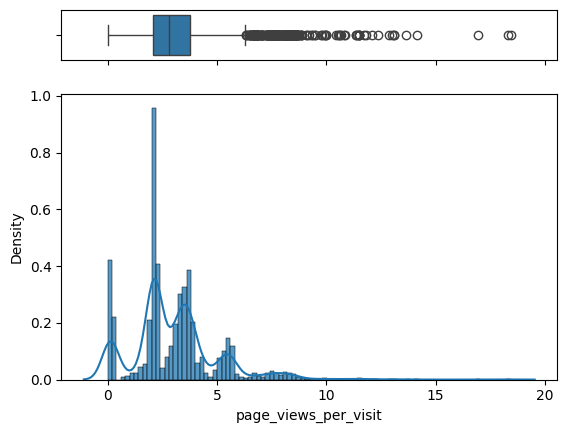

In [33]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df, x='page_views_per_visit', ax=ax_box)
sns.histplot(data=df, x='page_views_per_visit', ax=ax_hist, stat='density')
sns.kdeplot(data=df, x='page_views_per_visit', ax=ax_hist)
ax_box.set(xlabel='page_views_per-visit')
plt.show()

In [34]:
df['page_views_per_visit'].skew()

np.float64(1.2650041233027869)

**Observtions:**

* The chart is highly skewed (skew value of 1.3); it will need to be transformed before modeling.
* Leads views ~3 pages.
* There are outliers showing a certain number of leads viewing 7+ pages per visit (more engaged leads).

In [35]:
# Overwrite original feature
df['page_views_per_visit'] = np.log1p(df['page_views_per_visit'])

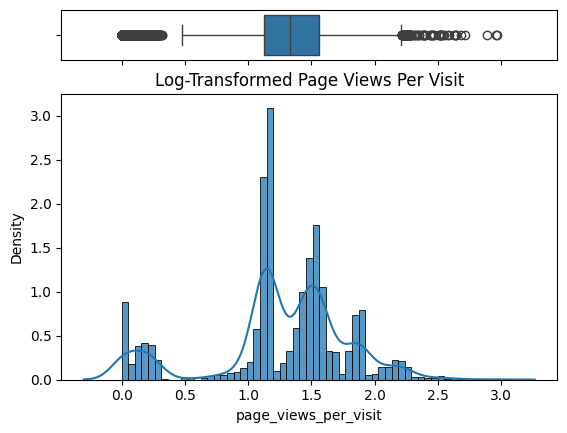

In [36]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df, x='page_views_per_visit', ax=ax_box)
sns.histplot(data=df, x='page_views_per_visit', ax=ax_hist, stat='density')
sns.kdeplot(data=df, x='page_views_per_visit', ax=ax_hist)
ax_box.set(xlabel='page_view_per_visit')
plt.title('Log-Transformed Page Views Per Visit')
plt.show()

In [37]:
df['page_views_per_visit'].skew()

np.float64(-0.7561055488054783)

**Observations:**

* Skew value is better and closer to normal (-0.76).
* Outliers are tighter.

**7. print_media_newspaper**

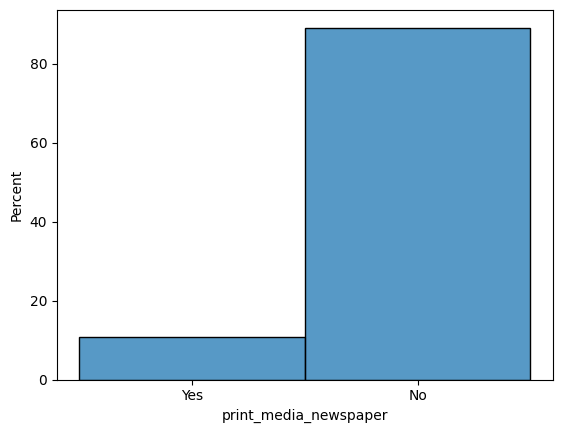

In [38]:
sns.histplot(data=df, x='print_media_newspaper', stat='percent')
plt.show()

**Observations:**

* ~85% of leads were not exposed via a newspaper campaign.
* ~15% of leads were exposed via a newspaper campaign.

**8. print_media_magazine**

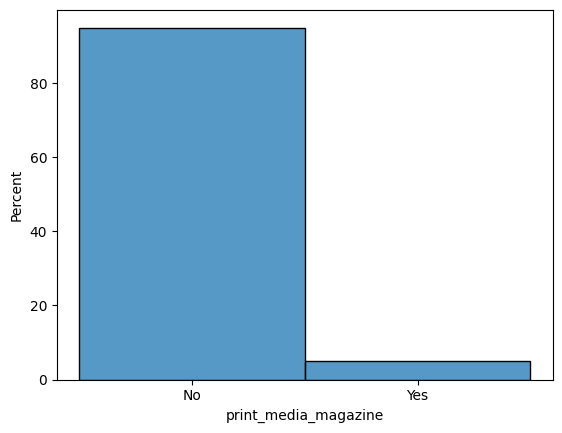

In [39]:
sns.histplot(data=df, x='print_media_magazine', stat='percent')
plt.show()

**Observations:**

* ~89% of leads were not exposed via a magazine campaign.
* ~11% of leads were exposed via a magazine campaign.

**9. digital_media**

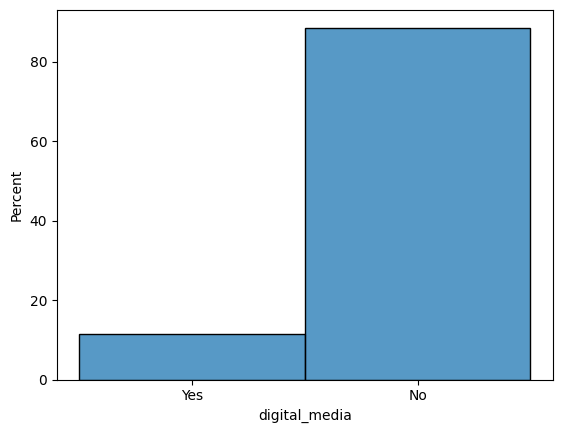

In [40]:
sns.histplot(data=df, x='digital_media', stat='percent')
plt.show()

**Observations:**

* ~85% of leads did not have interactions/exposure via digital platforms.
* ~15% of leads had interactions/exposure via digital platforms.

**10. educational_channels**

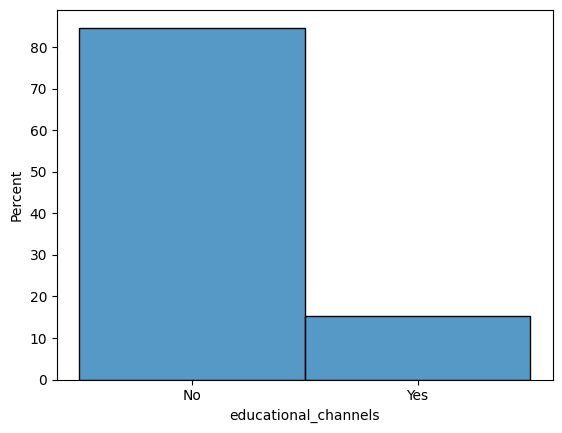

In [41]:
sns.histplot(data=df, x='educational_channels', stat='percent')
plt.show()

**Observations:**
* ~84% of leads have not heard of the company via educational channels.
* ~16% of leads have heard of the company via educational channels.

**12. referral**

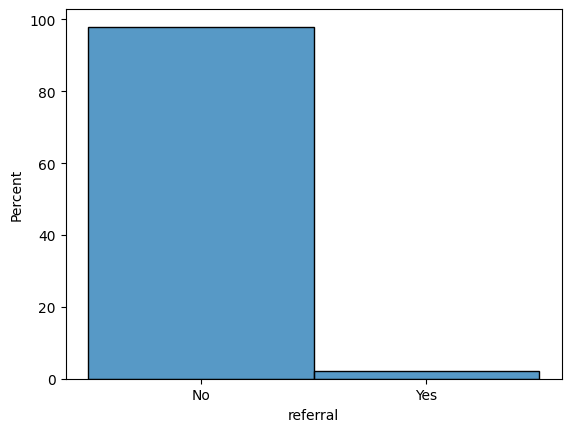

In [42]:
sns.histplot(data=df, x='referral', stat='percent')
plt.show()

**Observations:**

* ~97% of leads have not heard of the company via referral.
* ~3% of leads have heard of the company via referral.

**13. status**

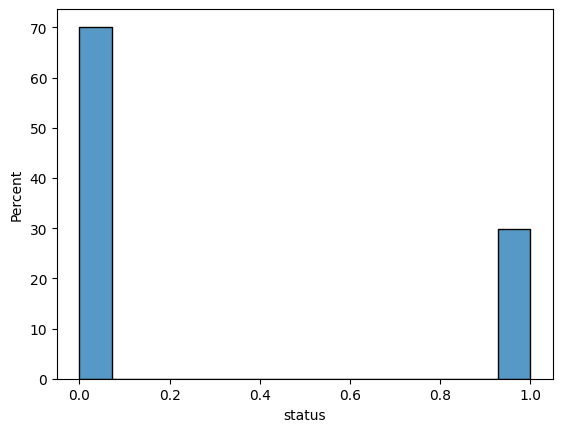

In [43]:
sns.histplot(data=df, x='status', stat='percent')
plt.show()

**Observations:**

* ~69% of leads were not converted to paid customers (indicate those who are curious, but not fully committed or eligible).
* ~31% of leads were converted to paid customers (indicates the highly engaged, high-profile completions, more page views per visit, time spent, and website visits).

**Bivariate Analysis**

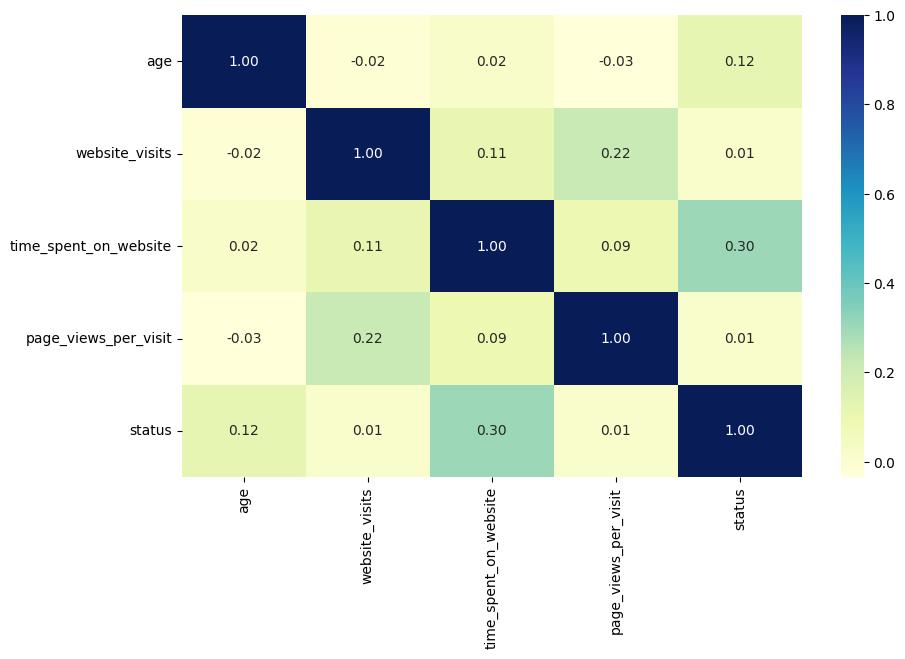

In [44]:
# Plotting the correlation between numerical variables
numerical_features=df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_features].corr(),annot=True, fmt='0.2f', cmap='YlGnBu');

**Observations:**

* Leads who spend more time on the website have a moderate positive correlation with CR.

* Page views per visit also have a moderate correlation with website visits, which is understandable.

* Age also has a slight positive correlation when it comes to CR.

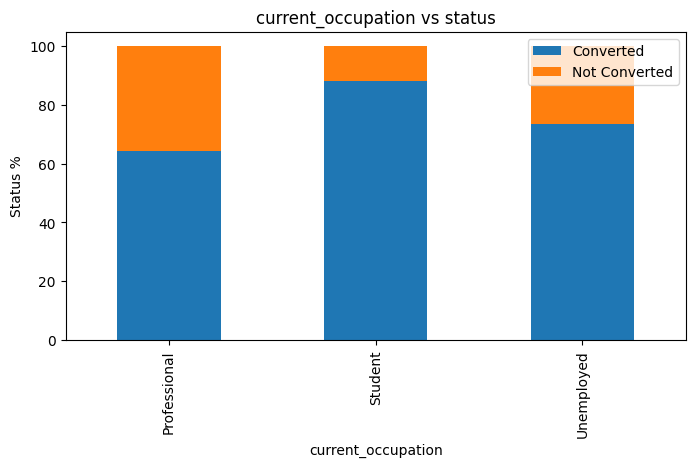

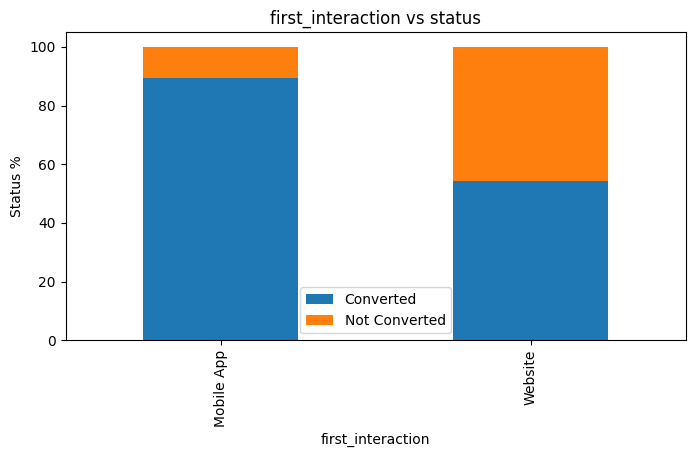

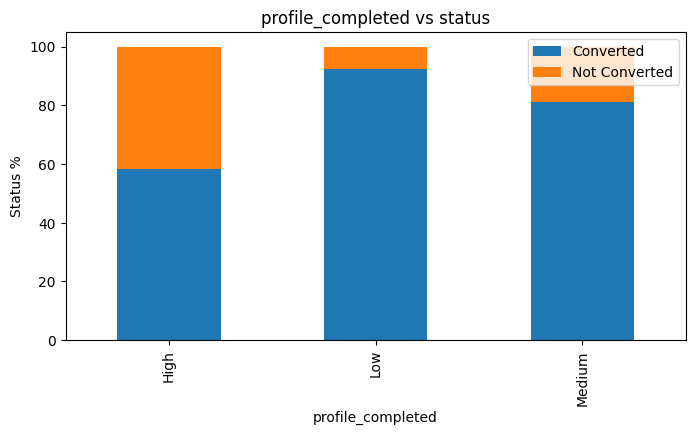

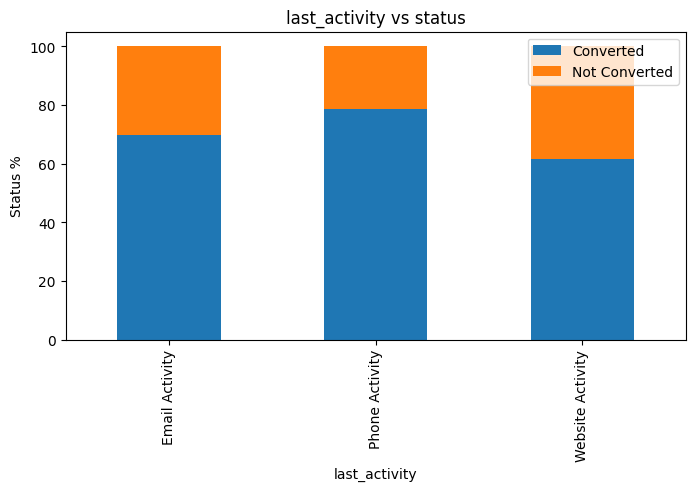

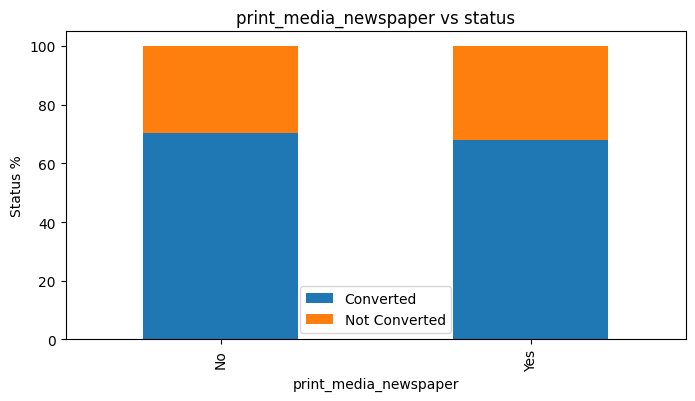

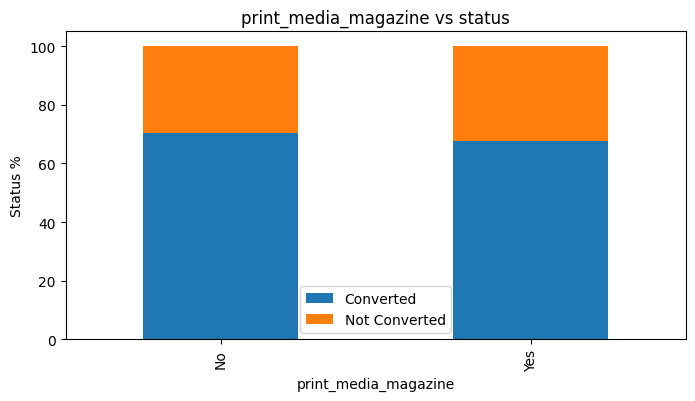

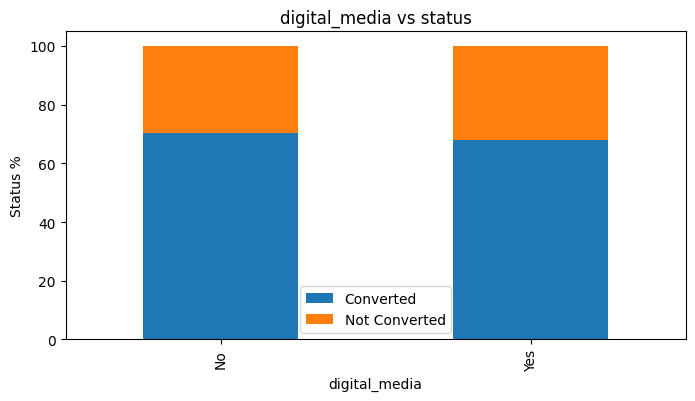

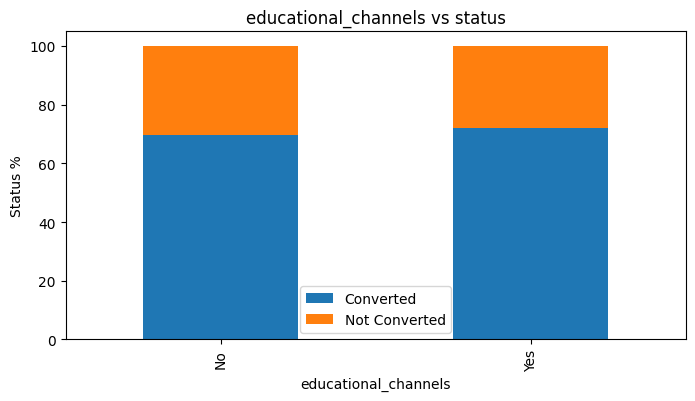

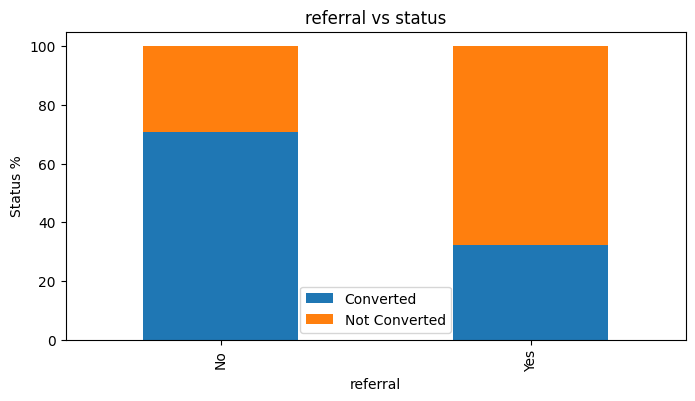

In [45]:
# Viewing counts for categorical features
for i in categorical_features:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Status %')
        plt.xlabel(i)
        plt.title(i+' vs status')
        plt.legend(labels=['Converted','Not Converted'])

**Observations:**

* Students have the highest CR at ~ 90%. This can be due to a strong desire to upskill. The unemployed are not too far behind with a CR of ~ 75%. This may be due to their desire to re-enter the workforce or embark on a career change. The professionals have a low CR (~ 65%), and this could be due to whether this population considers the program to be a worthy investment (especially at the age at which most of these professionals are).

* Leads are more likely to convert via mobile app than website. This could be in association with students who are a younger population, and their primary source of communication is through mobile phones, they are better at navigating through apps.

* There's a phenomenon that those who have less completed profiles have an extremely high CR (with those who partially complete following closely behind). It's best to consider whether profile completion is a necessary step for conversion.

* The previously mentioned phenomeon could correlate with the high CR via phone activity. Perhaps most conversions are taking place via phone sign-ups rather than website (consider a more user-friendly, straightforward form).

* Print media (both newspaper and magazine) have similar trends, and the campaign would need to be readjusted.

* The digital media campaign would need to be modified for a better outcome.

* There's not a significant difference between the converted and non-converted leads in the educational channel, but it is important enough to invest in this campaign due to the high CR of students (continue consistency).

* Those who are referred convert the least, and this could be due to a lack of interest and not sharing the same desire as those who referred them.

In [46]:
# Checking the relationship between status and numerical values
df.groupby(['status'])[numerical_features].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
status,,,,,
0,45.153014,1.354469,577.420711,1.259654,0.0
1,48.663762,1.362692,1068.397967,1.274450,1.0


**Observations:**

* Converted and Non-converted leads are in the range of 45-49, with most of the converted leads ~ 48.

* Those who converted spent a greater amount of time on the website (NC = 10 mins and C = 18 mins (rounded)) than those who didn't convert.

* Both web visits and page views are nearly identical.



---


**Question 1**


In [47]:
# Focusing solely on leads (1s)
# Group by occupation and calculate counts and CR
occupation_anlys = df.groupby('current_occupation')['status'].agg(['count', 'sum'])
occupation_anlys['conversion_rate'] = (occupation_anlys['sum'] / occupation_anlys['count']) * 100 # express as a percentage

# Sort to see which occupation converts best (most likely to become paid customers)
occupation_anlys = occupation_anlys.sort_values('conversion_rate', ascending=False)
occupation_anlys


,count,sum,conversion_rate
current_occupation,,,
Professional,2616,929,35.512232
Unemployed,1441,383,26.578765
Student,555,65,11.711712


**Observations:**
* The highest leads are professionals with the highest CR percentage in their group. The expectations of this population can result in a desire for certifications, a focus on ROI (return on investment), and a pursuit of leadership positions, among other goals.

* With professionals being the highest in leads and prospected paid customers, we can assume that despite the CR being ~10% difference from the 'Unemployed', occupation is still a factor in how it affects lead status.



---


**Question 2**

In [48]:
channel_anlys = df.groupby('first_interaction')['status'].agg(['count', 'sum'])
channel_anlys['conversion_rate'] = (channel_anlys['sum'] / channel_anlys['count']) * 100

# Sort to see the best-performing channels
channel_anlys = channel_anlys.sort_values('conversion_rate', ascending=False)
channel_anlys

,count,sum,conversion_rate
first_interaction,,,
Website,2542,1159,45.594020
Mobile App,2070,218,10.531401


**Observations:**
* The website CR far outnumbers those of the mobile app, despite close volume of counts.

* Indicates that the company's website UI (User Interface) is more advantageous (better content, direct interaction rather than having to download the app, easier navigation, and so on) than the app UI.

* Another consideration for higher initial interactions via the website could be the type of campaign or channels that link leads to either the website or app.




---

**Question 3**

In [49]:
# Group by last_activity and calculate CR
interaction_anlys = df.groupby('last_activity')['status'].agg(['count', 'sum'])
interaction_anlys['conversion_rate'] = (interaction_anlys['sum'] / interaction_anlys['count']) * 100

# Sort by highest CR
interaction_anlys = interaction_anlys.sort_values('conversion_rate', ascending=False)
interaction_anlys


,count,sum,conversion_rate
last_activity,,,
Website Activity,1100,423,38.454545
Email Activity,2278,691,30.333626
Phone Activity,1234,263,21.312804


**Observations:**
* Based on 'last_activity', the best mode of interaction would be website activity with a CR of 38%.

* However, email activity has a higher volume of leads, which indicates a strong channel of interaction.



---

**Question 4**

In [50]:
channels_CR = [
    'print_media_newspaper',
    'print_media_magazine',
    'digital_media',
    'educational_channels',
    'referral'
]

df[channels_CR] = df[channels_CR].replace({'Yes': 1, 'No': 0})

channel_results = []

for channel in channels_CR:
    total = df[df[channel] == 1].shape[0]
    converted = df[(df[channel] == 1) & (df['status'] == 1)].shape[0]
    rate = (converted / total) * 100 if total > 0 else 0
    channel_results.append({
        'Channel': channel,
        'Total Leads': total,
        'Converted Leads': converted,
        'Conversion Rate (%)': round(rate, 2)
    })

channel_anlys = pd.DataFrame(channel_results).sort_values(by='Conversion Rate (%)', ascending=False)
channel_anlys

,Channel,Total Leads,Converted Leads,Conversion Rate (%)
4,referral,93,63,67.74
1,print_media_magazine,233,75,32.19
0,print_media_newspaper,497,159,31.99
2,digital_media,527,168,31.88
3,educational_channels,705,197,27.94


**Observations:**
* The highest lead CR is found in referrals, at ~68%, despite having the lowest total leads compared to the other channels.

* Education channels have the highest total leads but the lowest CR. This population of leads shows high interest but may not commit to the program, possibly due to having other options that better align with their desires or current needs.

* Both print medias and digital media are either consistent or stagnated (would advise revisiting these channels to better optimize the strategy.



---

**Question 5**


In [51]:
# Group by profile_completed level and calculate CR
profile_anlys = df.groupby('profile_completed')['status'].agg(['count', 'sum'])
profile_anlys['conversion_rate'] = (profile_anlys['sum'] / profile_anlys['count']) * 100
profile_anlys = profile_anlys.rename(columns={'count': 'Total Leads', 'sum': 'Converted Leads'})

profile_anlys = profile_anlys.sort_values('conversion_rate', ascending=False)
profile_anlys


,Total Leads,Converted Leads,conversion_rate
profile_completed,,,
High,2264,946,41.784452
Medium,2241,423,18.875502
Low,107,8,7.476636


**Observations:**
* Having more information about a prospect increases the likelihood that the prospect will become a paid customer, with a CR of ~42%. This indicates the intentionality and the willingness to commit to the program.

* The medium profile completion is also high in total leads, but has a significantly lower percentage of CR. It could be based on curiosity rather than being ready to commit, as one of the prominent reasons for having a lower CR.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [52]:
df.isnull().sum().sum()

np.int64(0)

In [53]:
df.duplicated().sum()

np.int64(14)

**Observations:**

* There are 14 duplicated values found.

In [54]:
# Find rows that are duplicates
duplicates = df[df.duplicated()]

duplicates

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_newspaper,print_media_magazine,digital_media,educational_channels,referral,status
1097,59,Professional,Website,High,0.0,0,0.0,Email Activity,0,0,0,0,0,1
1375,58,Professional,Website,High,0.0,0,0.0,Phone Activity,0,0,0,0,0,1
1592,56,Professional,Mobile App,Medium,0.0,0,0.0,Phone Activity,0,0,0,0,0,0
1675,56,Professional,Mobile App,Medium,0.0,0,0.0,Phone Activity,0,0,0,0,0,0
1679,32,Unemployed,Mobile App,High,0.0,0,0.0,Email Activity,0,0,0,0,0,0
2789,59,Unemployed,Mobile App,High,0.0,0,0.0,Email Activity,0,0,0,0,0,0
2980,58,Professional,Mobile App,High,0.0,0,0.0,Email Activity,0,0,0,0,0,0
3013,58,Unemployed,Website,High,0.0,0,0.0,Email Activity,0,0,0,0,0,0
3227,59,Unemployed,Website,Medium,0.0,0,0.0,Phone Activity,0,0,0,0,0,0
3278,57,Professional,Mobile App,Medium,0.0,0,0.0,Phone Activity,0,0,0,0,0,0


**Observations:**

* The duplicates are not 'true duplicates' based on the binary format of each column, despite having different meanings.

In [55]:
# Converting time from seconds to minutes
# Needed to overwrite original column for values to show conversion
df['time_spent_on_website'] = df['time_spent_on_website'] / 60

# Creating an engagement score for the model
# Better understand the activity of each lead.
df['engagement_score'] = (
    df['website_visits'] +
    df['page_views_per_visit'] +
    df['time_spent_on_website']
)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [56]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_newspaper,print_media_magazine,digital_media,educational_channels,referral,status,engagement_score
0,57,Unemployed,Website,High,2.079442,27.316667,1.051171,Website Activity,1,0,1,0,0,1,30.447279
1,56,Professional,Mobile App,Medium,1.098612,1.383333,0.277632,Website Activity,0,0,0,1,0,0,2.759577
2,52,Professional,Website,Medium,1.386294,5.500000,0.071390,Website Activity,0,0,1,0,0,0,6.957684
3,53,Unemployed,Website,High,1.609438,7.733333,1.117434,Website Activity,0,0,0,0,0,1,10.460205
4,23,Student,Website,High,1.609438,10.000000,2.885583,Email Activity,0,0,0,0,0,0,14.495020


In [57]:
df.shape

(4612, 15)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   float64
 5   time_spent_on_website  4612 non-null   float64
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_newspaper  4612 non-null   int64  
 9   print_media_magazine   4612 non-null   int64  
 10  digital_media          4612 non-null   int64  
 11  educational_channels   4612 non-null   int64  
 12  referral               4612 non-null   int64  
 13  status                 4612 non-null   int64  
 14  engagement_score       4612 non-null   float64
dtypes: f

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.000000,51.000000,57.000000,63.000000
website_visits,4612.0,1.356924,0.568859,0.0,1.098612,1.386294,1.791759,3.433987
time_spent_on_website,4612.0,12.066855,12.397145,0.0,2.479167,6.266667,22.279167,42.283333
page_views_per_visit,4612.0,1.264072,0.540154,0.0,1.124199,1.332894,1.559460,2.967024
print_media_newspaper,4612.0,0.107762,0.310114,0.0,0.000000,0.000000,0.000000,1.000000
print_media_magazine,4612.0,0.050520,0.219040,0.0,0.000000,0.000000,0.000000,1.000000
digital_media,4612.0,0.114267,0.318170,0.0,0.000000,0.000000,0.000000,1.000000
educational_channels,4612.0,0.152862,0.359894,0.0,0.000000,0.000000,0.000000,1.000000
referral,4612.0,0.020165,0.140579,0.0,0.000000,0.000000,0.000000,1.000000
status,4612.0,0.298569,0.457680,0.0,0.000000,0.000000,1.000000,1.000000


**Observations:**
* There are no missing values or extreme outliers. The data is ready for modeling.

## Building a Decision Tree model

In [60]:
# Create dummy variables for all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
# Create dummy variables for all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Encoded DataFrame for features
X = df_encoded.drop('status', axis=1)
y = df_encoded['status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Import accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8063583815028902

Confusion Matrix:
 [[841 136]
 [132 275]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       977
           1       0.67      0.68      0.67       407

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



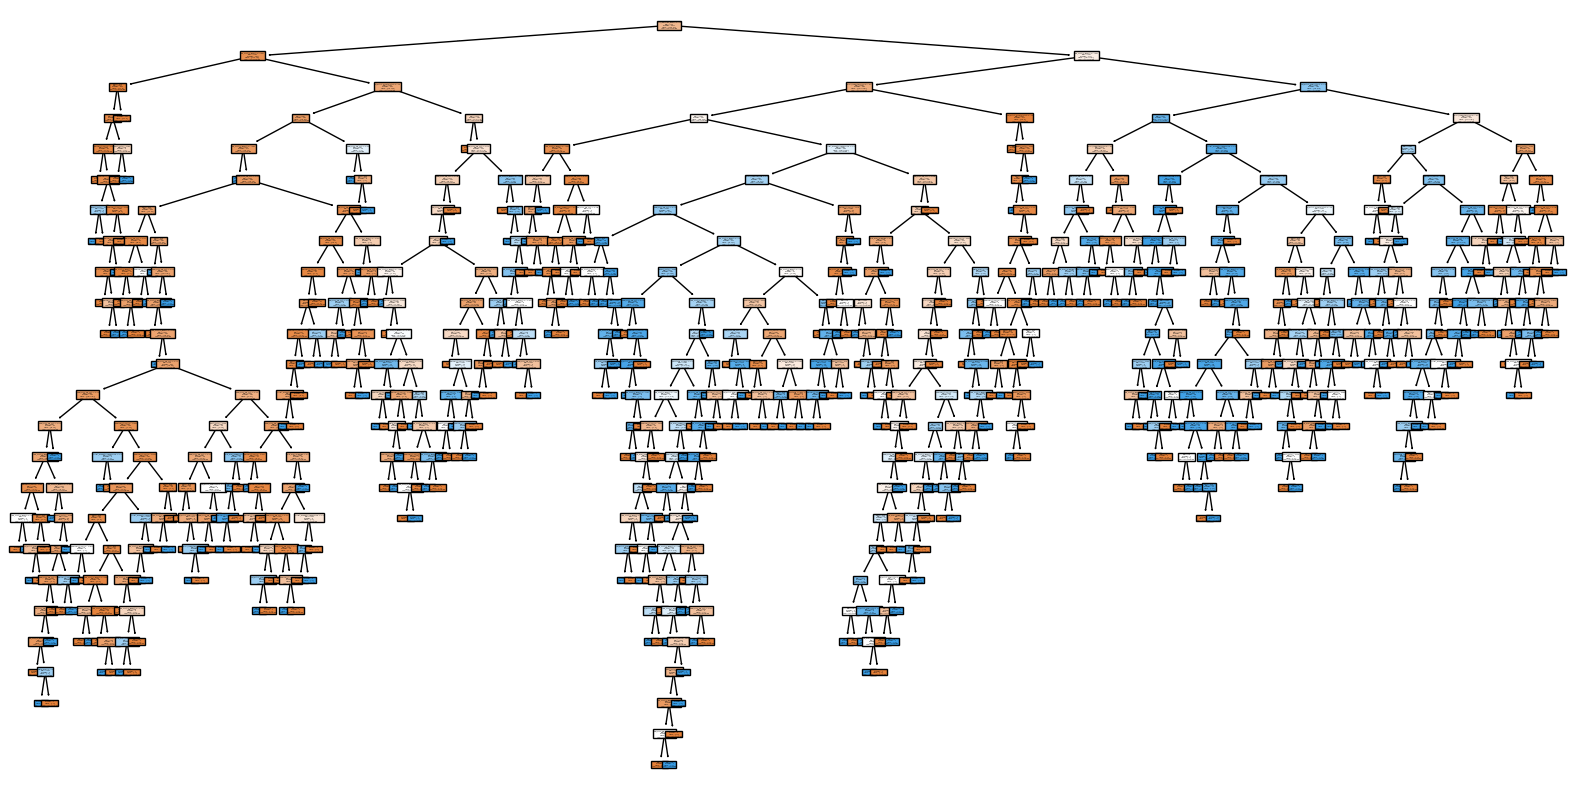

In [62]:
# Import plot_tree
from sklearn.tree import plot_tree
# Plot tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Converted', 'Converted'], filled=True);

## Do we need to prune the tree?

**DT is overly complex and would need pruning.**

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       971
           1       0.68      0.88      0.77       413

    accuracy                           0.84      1384
   macro avg       0.81      0.85      0.82      1384
weighted avg       0.86      0.84      0.85      1384

Cross-Validation Accuracy Scores: [0.82881907 0.81148429 0.835141   0.85140998 0.8340564 ]

Confusion Matrix:
 [[801 170]
 [ 51 362]]
Mean CV Accuracy: 0.832


Text(0.5, 1.0, 'Pruned Decision Tree')

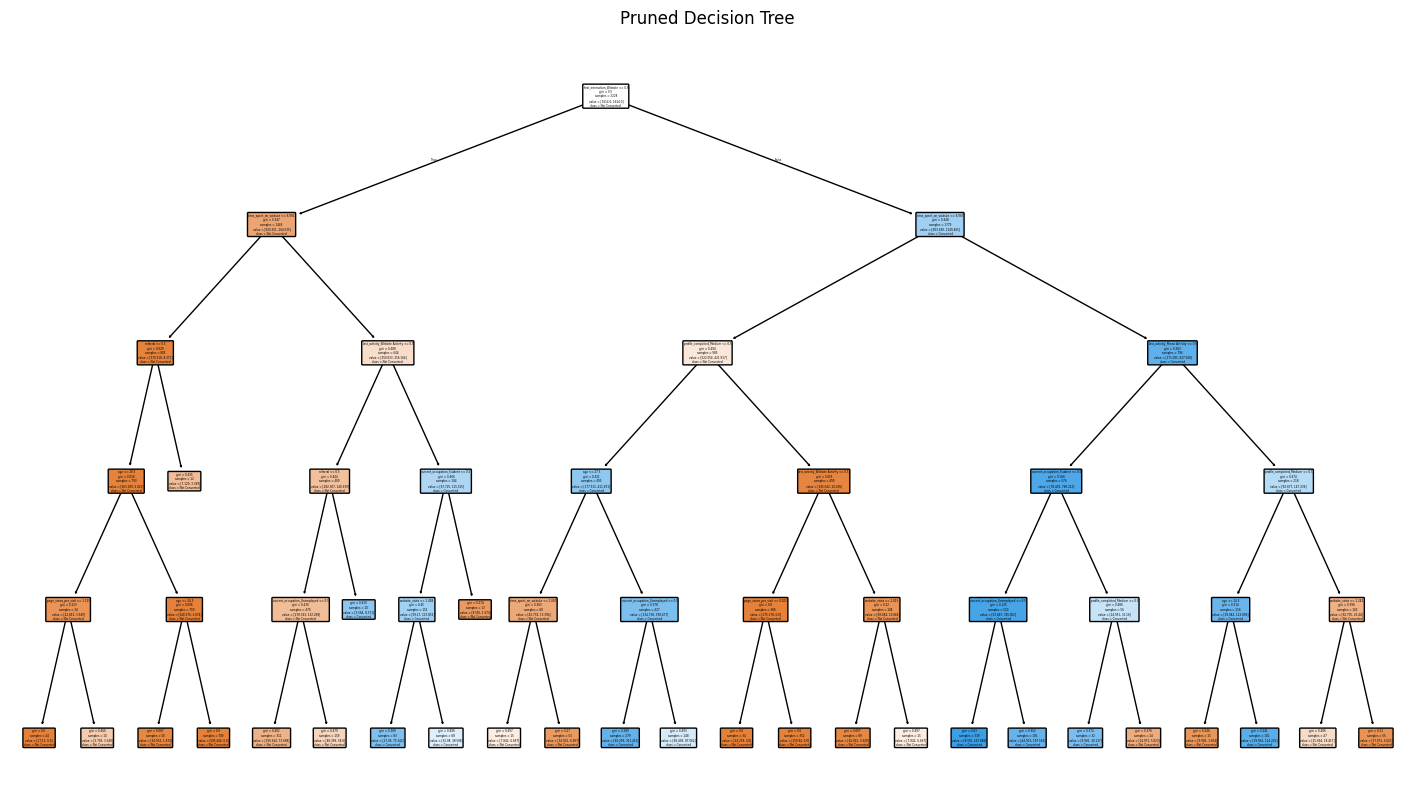

In [63]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Pruning
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)

# Train model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

# Cross-validation scores for robustness check
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Mean CV Accuracy:", round(cv_scores.mean(), 3))


plt.figure(figsize=(18, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Converted', 'Converted'], rounded=True)
plt.title("Pruned Decision Tree")

## Building a Random Forest model

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       971
           1       0.68      0.88      0.76       413

    accuracy                           0.84      1384
   macro avg       0.81      0.85      0.82      1384
weighted avg       0.86      0.84      0.84      1384

Cross-Validation Accuracy Scores: [0.81365114 0.82881907 0.8329718  0.8340564  0.82863341]
Mean CV Accuracy: 0.828


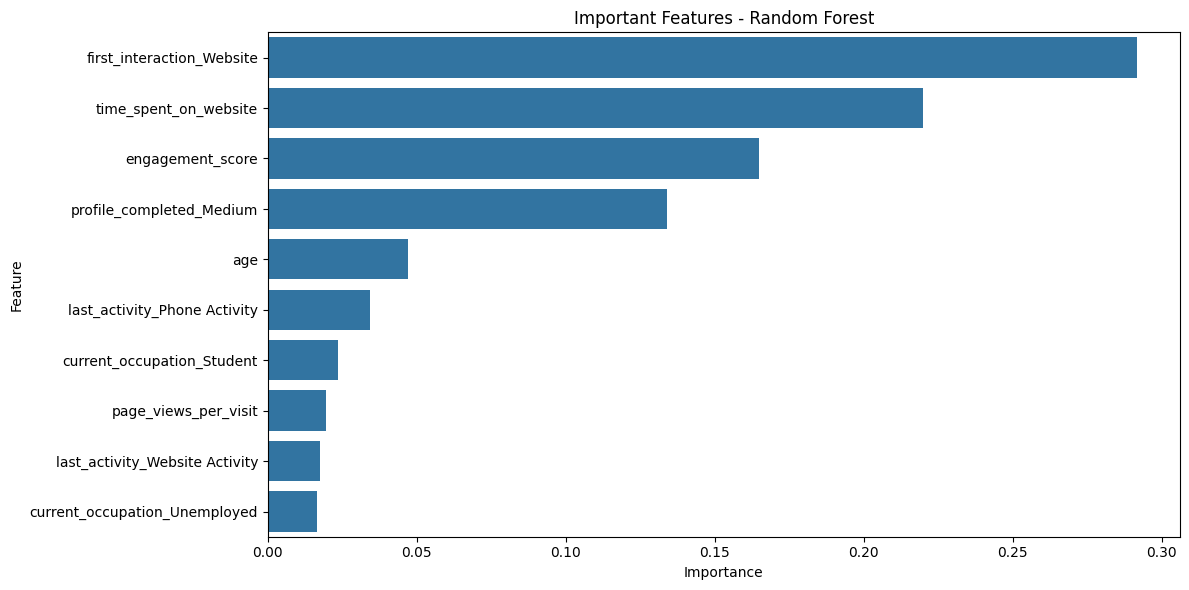

In [64]:
# Implement Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    max_features='sqrt',
    random_state=42,
)

# Fit model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Implement Cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 3))

# Highlight features for most CR
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()


## Do we need to prune the tree?

RMSE : 0.3244
MAE  : 0.2375
R²   : 0.4973
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.78      0.69      0.74       413

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384

Accuracy: 0.85

Cross-Validation Accuracy Scores: [0.85915493 0.85048754 0.87744035 0.86117137 0.84707158]
Mean CV Accuracy: 0.859


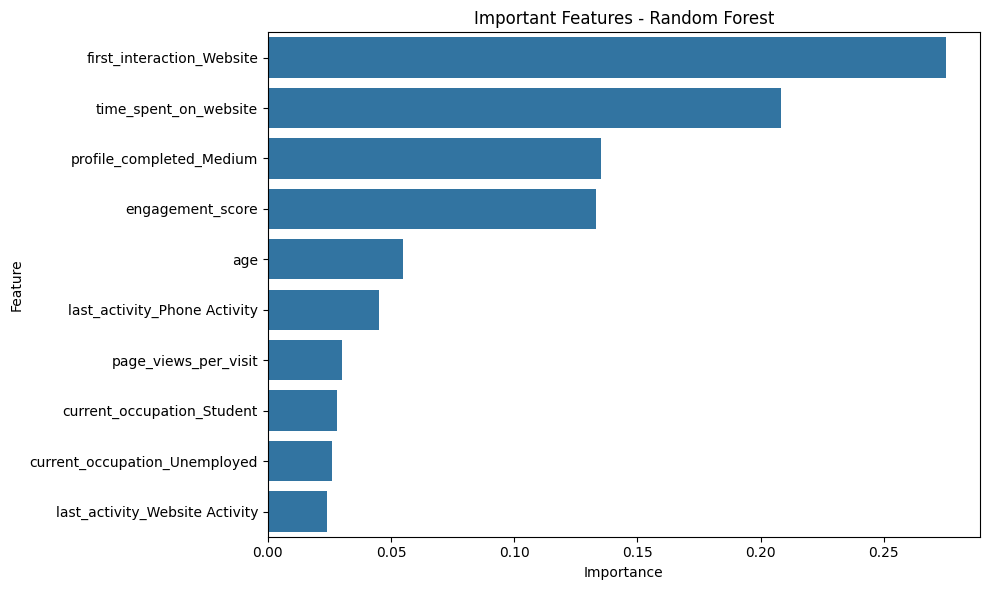

In [65]:
# Pruning RF to improve the Classification Report
# Implement Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

# Fit the Model
rf.fit(X_train, y_train)

# Make Predictions
y_pred = rf.predict(X_test)

# Predict probabilities for class 1
y_proba = rf.predict_proba(X_test)[:, 1]

# Compute regression-style error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_proba))
mae = mean_absolute_error(y_test, y_proba)
r2 = r2_score(y_test, y_proba)

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.3f}".format(cv_scores.mean()))

# Feature Importance Plot
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title('Important Features - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Observations:**

* No further tuning or pruning will be applied to the model. I initially felt more comfortable with a higher recall than a higher precision amongst the converters. However, I would like the accuracy score to remain a priority and to remain as high as it is currently.

## Actionable Insights and Recommendations

***Summary***

* A machine learning pipeline was implemented to process lead data, engineer relevant features, and train predictive models. Random Forest and Gradient Boosting classifiers were used to model the likelihood of lead conversion. Key performance metrics included accuracy, precision, recall, F1-score, R², MAE, and RMSE (I did not use MAPE due to the high number of 0-values within the dataset, which can render it an unreliable metric).

***Key Features for Lead Conversion***

* **Profile Completion:** Leads who completed more of their profile had a much higher chance of converting.

* **Time Spent on Website:** More engaged users show a higher likelihood of conversion.

* **Current Occupation:** Professionals are more likely to convert.

* **Page Views per Visit:** Those with higher views shows a higher CR.

* **Website Visits:** Frequent returns suggest stronger interest.

* **First Interactions:** Leads from the website interact differently than those from the mobile app.

***Profile of Leads Who Are Likely to Convert***

* **Age:** Between 25-35 (professionals). Although there is a greater number of leads in the 55+ age range, according to the data, they tend to be hesitant to commit.

* **Occupation:** Professional.

* **Profile Completion:** Medium-High to High.

* **First Interaction:** Website (engaged user).

* **Website Engagement:** High time on page, multiple visits, and more page views per visit (higher activity and consistency in user engagement).

***Actionable Insights and Recommendations***

* When it comes to marketing, a focus on those with high-profile completion and consistent engagement should be of priority.

* To avoid bounces, low scroll depth, and drop-offs, improvements on the website UI (specifically the fill-out forms and impressions) should be made by the following:
 * Eliminating tedious fill outs (less information requirement and quicker returns)
 * Incentives to fill out forms (e.g., a sneak peek of a course or a free e-book pertaining to their goals/interests)
 * Increase micro-conversions (e.g., more videos due to how this generation is visually-driven more so than word-driven )
 * Direct information to grab the attention of the landing pages (better impressions to increase CTR and macro-conversion)
 * Implementing sticky contents (e.g, placement tests, more detailed FAQ, or statistical results of career outcomes)
 * Would highly recommend A/B testing
* There's a strong interest from students and professionals
 * Provide financial incentives to students to help them in the program (scholarships)
 * Provide transfer-ready credits
 * A variety of certifications can be provided to professionals who are looking to reskill
 * Testimonials are also an advantage in encouraging commitment among professionals
 * Partnerships with educational institutions can strengthen the educational channels


